### In Depth: Naive Bayes Classification

• The previous four sections have given a general overview of the concepts of machine learning.

• In this section and the ones that follow, we will be taking a closer look at several specific algorithms for supervised and unsupervised learning, starting here with naive Bayes classification.

• Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

• Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

• This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

### Bayesian Classification

• Naive Bayes classifiers are built on Bayesian classification methods.

• These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

• In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as P(L | features).

• Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

    P(L | features)=P(features | L)P(L) / P(features)

• If we are trying to decide between two labels—let's call them L1 and L2—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

    P(L1 | features) / P(L2 | features)=P(features | L1) / P(features | L2) * P(L1) / P(L2)

• All we need now is some model by which we can compute P(features | Li) for each label.

• Such a model is called a generative model because it specifies the hypothetical random process that generates the data.

• Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. 

• The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

• This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

• Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

• We begin with the standard imports:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Gaussian Naive Bayes

• Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.

• In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

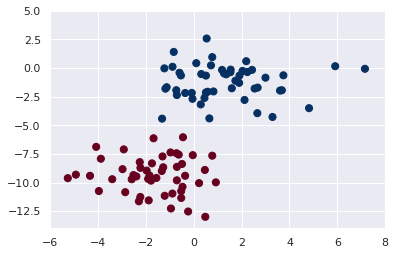

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.xlim(-6, 8)
plt.ylim(-14, 5);

• One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.

• This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

• The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.

• With this generative model in place for each class, we have a simple recipe to compute the likelihood P(features | L1) for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

• This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

• Now let's generate some new data and predict the label:

In [12]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [13]:
Xnew

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       ...,
       [-4.32134532, -7.70649139],
       [ 0.08823081,  0.94005305],
       [ 7.05928655, -8.44990818]])